 negative latitudes represent the southern hemisphere, and negative longitudes represent the western hemisphere

# Import Liblaries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
pd.options.display.max_columns=None
pd.options.display.max_rows = None
from scipy import stats
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn import metrics 
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve,roc_auc_score

# Load Dataset

In [4]:
df_supply_chain_1= pd.read_csv('DataCoSupplyChainDataset[1].csv',encoding='latin-1')
df_supply_chain_1.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


# Copy the dataset 

In [5]:
df_supply_chain=df_supply_chain_1.copy()

In [6]:
df_supply_chain.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


# Checking the info

In [7]:
df_supply_chain.shape

(180519, 53)

In [8]:
df_supply_chain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

**Observation**
1.  In 'Days for shipping (real)' and 'Days for shipment (scheduled)' columns have the null values so we will remove the rows from data those have value 0 days 

In [9]:
df_supply_chain[df_supply_chain[ 'Days for shipping (real)']== 0].count()[1]

5080

In [10]:
df_supply_chain = df_supply_chain[df_supply_chain['Days for shipping (real)'] != 0]

In [11]:
df_supply_chain[df_supply_chain[ 'Days for shipment (scheduled)']== 0].count()[1]

4657

In [12]:
df_supply_chain = df_supply_chain[df_supply_chain['Days for shipment (scheduled)'] != 0]

In [13]:
df_supply_chain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170782 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           170782 non-null  object 
 1   Days for shipping (real)       170782 non-null  int64  
 2   Days for shipment (scheduled)  170782 non-null  int64  
 3   Benefit per order              170782 non-null  float64
 4   Sales per customer             170782 non-null  float64
 5   Delivery Status                170782 non-null  object 
 6   Late_delivery_risk             170782 non-null  int64  
 7   Category Id                    170782 non-null  int64  
 8   Category Name                  170782 non-null  object 
 9   Customer City                  170782 non-null  object 
 10  Customer Country               170782 non-null  object 
 11  Customer Email                 170782 non-null  object 
 12  Customer Fname                

**Observation**
1. The dataset has 170782 observation and 53 variables.
2. there is 24 categorical columns and 29 numericals columns 
3. 2 columns have null values more than 85% Product Description,Order Zipcode.

# 5 Point summary

In [14]:
df_supply_chain.describe().T

,count,mean,std,min,25%,50%,75%,max
Days for shipping (real),170782.0,3.669801,1.491022,2.000000,2.000000,4.000000,5.000000,6.000000
Days for shipment (scheduled),170782.0,3.099003,1.216057,1.000000,2.000000,4.000000,4.000000,4.000000
Benefit per order,170782.0,22.039117,104.736711,-4274.979980,7.010000,31.590000,64.889999,911.799988
Sales per customer,170782.0,183.328459,120.436385,7.490000,104.379997,163.990005,247.500000,1939.989990
Late_delivery_risk,170782.0,0.553472,0.497134,0.000000,0.000000,1.000000,1.000000,1.000000
Category Id,170782.0,31.847068,15.637362,2.000000,18.000000,29.000000,45.000000,76.000000
Customer Id,170782.0,6690.736817,4162.494527,1.000000,3258.000000,6457.000000,9778.000000,20756.000000
Customer Zipcode,170779.0,35878.008572,37543.407933,603.000000,725.000000,19148.000000,78201.000000,99205.000000
Department Id,170782.0,5.443255,1.629083,2.000000,4.000000,5.000000,7.000000,12.000000
Latitude,170782.0,29.700274,9.816894,-33.937553,18.265211,33.130123,39.277561,48.781933


**Observation**
1. maximum days required to shipping is 6 but as per the schedule is 4. from the data 50% of delivery estimation is before a day of scheduled.
2. highest benefit per order is 911 rupees and highest loss is 4275 rupees if we take average benefit per order is 22 rupees.
3. customer average bucket size is 7.5 rupees and highest is 1940 rupees.
   

In [15]:
df_supply_chain.describe(include='O')

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Image,Product Name,shipping date (DateOrders),Shipping Mode
count,170782,170782,170782,170782,170782,170782,170782,170774,170782,170782,170782,170782,170782,170782,170782,170782,170782,170782,170782,170782,170782,170782,170782,170782
unique,4,4,50,563,2,1,778,1109,1,3,46,7415,11,5,3578,163,62181,23,1085,9,118,118,60130,3
top,DEBIT,Late delivery,Cleats,Caguas,EE. UU.,XXXXXXXXX,Mary,Smith,XXXXXXXXX,Consumer,PR,9126 Wishing Expressway,Fan Shop,LATAM,New York City,Estados Unidos,6/16/2015 7:28,Central America,Inglaterra,COMPLETE,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,9/16/2015 16:27,Standard Class
freq,65609,94523,23198,63336,104993,170782,61722,60643,170782,88356,65789,121,63246,48944,2084,23439,5,26918,6357,56327,23163,23163,10,107752


**Observation**
1. there are 4 type of payment method used by customer in that Debit Card transaction is most popular.
2. the late delivery is the highest weightage than others.
3. the most of customer from EE.UU 
4. lots of customer from Consumer type segment 

# Checking the Multicolinearity between features

In [16]:
df_supply_chain.corr()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
Days for shipping (real),1.000000,0.376939,-0.006758,-0.001531,0.421895,-0.000102,0.004379,0.001644,-0.001822,-0.000763,0.002420,0.004379,-1.060733e-03,-0.000635,0.000560,2.707444e-03,-0.001133,-0.001751,-0.005875,0.001094,-0.001297,-0.001531,-0.006758,-0.010671,-0.000635,-0.000102,NaN,-0.001751,NaN
Days for shipment (scheduled),0.376939,1.000000,-0.001781,0.003001,-0.468287,0.000276,0.001467,-0.000680,0.000007,-0.001221,0.000610,0.001467,-2.132128e-04,0.000236,0.000801,1.268443e-03,-0.000188,0.002930,-0.003137,-0.001285,0.002855,0.003001,-0.001781,-0.005154,0.000236,0.000276,NaN,0.002930,NaN
Benefit per order,-0.006758,-0.001781,1.000000,0.133165,-0.003086,0.032066,0.008360,0.002329,0.031570,0.000215,-0.002458,0.008360,1.387011e-02,0.033494,0.064944,-1.827621e-02,0.013733,0.103092,0.822838,0.015823,0.131539,0.133165,1.000000,-0.003404,0.033494,0.032066,NaN,0.103092,NaN
Sales per customer,-0.001531,0.003001,0.133165,1.000000,-0.003270,0.226752,0.062926,-0.000803,0.233701,0.000112,0.000819,0.062926,8.114983e-02,0.237877,0.499612,-1.187910e-01,0.080267,0.783170,-0.001333,0.103968,0.989754,1.000000,0.133165,-0.001039,0.237877,0.226752,NaN,0.783170,NaN
Late_delivery_risk,0.421895,-0.468287,-0.003086,-0.003270,1.000000,0.001145,0.001863,0.000721,0.000450,-0.000009,0.000957,0.001863,-3.218346e-03,0.000891,-0.000333,5.848231e-04,-0.003301,-0.002149,-0.001814,0.000619,-0.003022,-0.003270,-0.003086,-0.015703,0.000891,0.001145,NaN,-0.002149,NaN
Category Id,-0.000102,0.000276,0.032066,0.226752,0.001145,1.000000,0.274258,0.002733,0.888893,0.003101,-0.002231,0.274258,1.979193e-01,0.991107,0.140851,3.278829e-04,0.186228,0.461772,-0.001600,-0.302436,0.228971,0.226752,0.032066,-0.006767,0.991107,1.000000,NaN,0.461772,NaN
Customer Id,0.004379,0.001467,0.008360,0.062926,0.001863,0.274258,1.000000,0.001135,0.136566,0.002420,-0.004812,1.000000,2.057825e-01,0.227614,0.040065,1.583720e-03,0.192806,0.112849,-0.001262,-0.090392,0.063703,0.062926,0.008360,-0.001985,0.227614,0.274258,NaN,0.112849,NaN
Customer Zipcode,0.001644,-0.000680,0.002329,-0.000803,0.000721,0.002733,0.001135,1.000000,0.002766,0.584935,-0.922301,0.001135,-4.113726e-04,0.003036,-0.001400,-3.641034e-04,-0.000404,0.002186,0.003614,-0.005251,-0.000959,-0.000803,0.002329,0.014146,0.003036,0.002733,NaN,0.002186,NaN
Department Id,-0.001822,0.000007,0.031570,0.233701,0.000450,0.888893,0.136566,0.002766,1.000000,0.002947,-0.002354,0.136566,1.062677e-01,0.906217,0.145230,9.380058e-05,0.101200,0.447412,-0.003024,-0.265602,0.235999,0.233701,0.031570,-0.006669,0.906217,0.888893,NaN,0.447412,NaN
Latitude,-0.000763,-0.001221,0.000215,0.000112,-0.000009,0.003101,0.002420,0.584935,0.002947,1.000000,-0.524220,0.002420,-3.728610e-03,0.002898,-0.002756,-3.804619e-03,-0.003837,0.000711,-0.000123,-0.001716,-0.000353,0.000112,0.000215,-0.002126,0.002898,0.003101,NaN,0.000711,NaN


# Droping the duplicate columns i.e. correlation = 1, and useless columns 

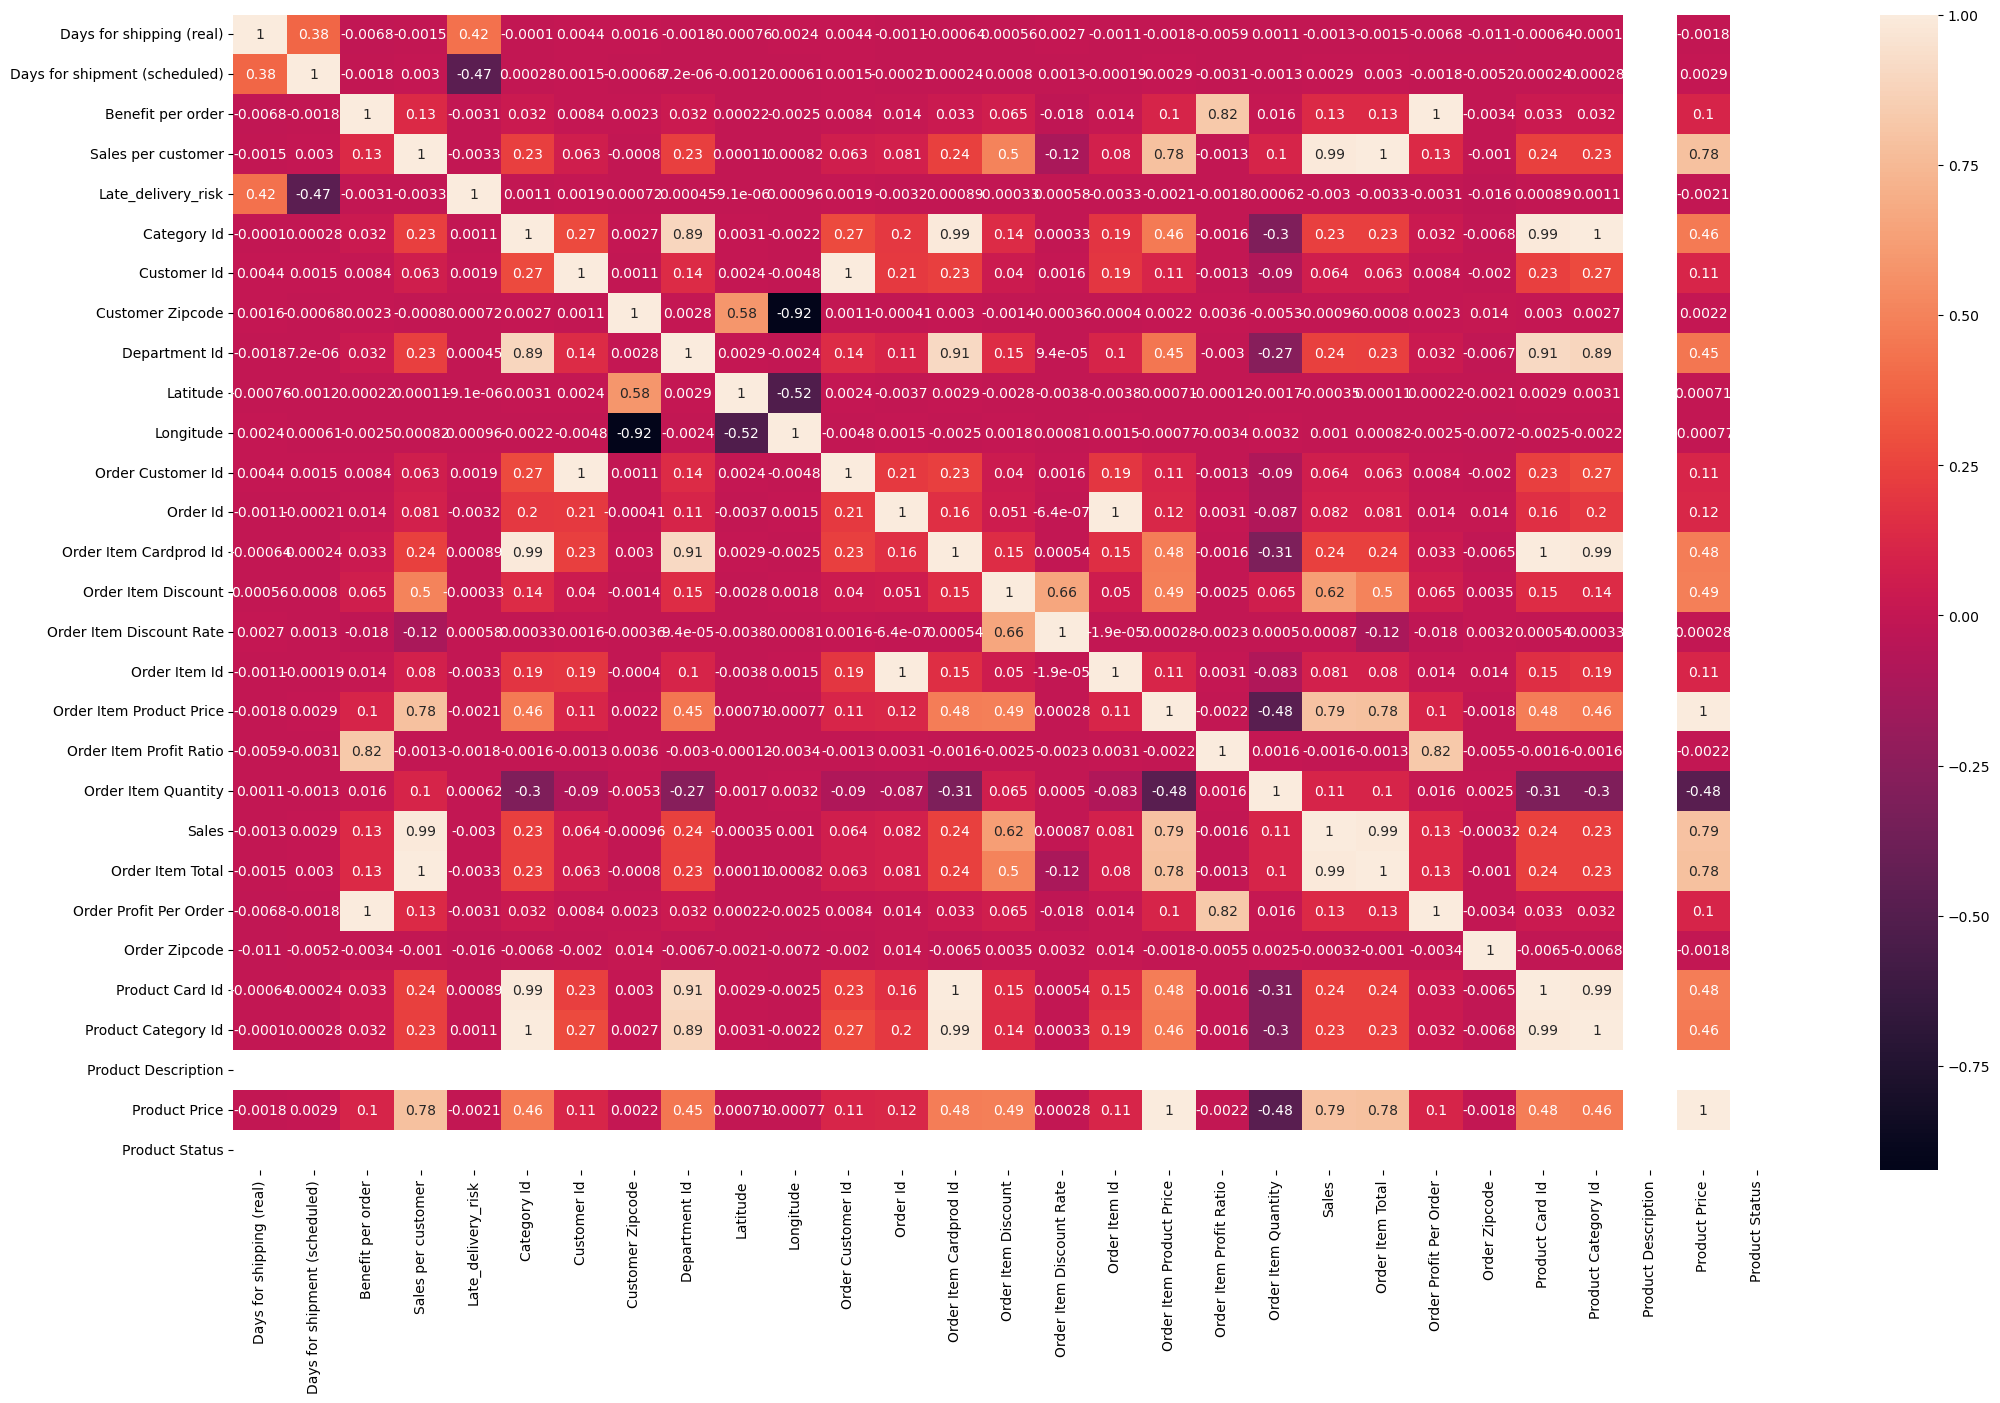

In [17]:
plt.figure(figsize=(25,15))
sns.heatmap(df_supply_chain.corr(),annot=True)
plt.show()

After comparing the values in columns pairs having co-relation of 1, we can see that all values are equal for these pair of 
columns. We can drop one of the columns from each of the above pairs as they are duplicate columns of each other.

In [18]:
df_supply_chain=df_supply_chain.drop(['Order Customer Id','Order Item Total','Order Item Cardprod Id',
                                     'Product Category Id','Order Item Product Price','Type','Customer Id','Customer Email',
                                     'Customer Password','Customer Fname','Customer Lname','Customer Zipcode','Customer State',
                                     'Customer Street', 'Product Description','Product Status','Order Item Discount',
                                     'Order Item Id','Order Item Profit Ratio','Order Zipcode','Order Item Discount Rate',
                                     'Order Id','Benefit per order','Product Card Id','Sales','Department Name','Product Image',
                                     'Department Id','Category Id'], axis=1)

# Checking info and datatype of each columns

In [19]:
df_supply_chain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170782 entries, 0 to 180518
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Days for shipping (real)       170782 non-null  int64  
 1   Days for shipment (scheduled)  170782 non-null  int64  
 2   Sales per customer             170782 non-null  float64
 3   Delivery Status                170782 non-null  object 
 4   Late_delivery_risk             170782 non-null  int64  
 5   Category Name                  170782 non-null  object 
 6   Customer City                  170782 non-null  object 
 7   Customer Country               170782 non-null  object 
 8   Customer Segment               170782 non-null  object 
 9   Latitude                       170782 non-null  float64
 10  Longitude                      170782 non-null  float64
 11  Market                         170782 non-null  object 
 12  Order City                    

In [20]:
df_supply_chain.shape

(170782, 24)

**Observation**
1. The dataset has 170782 observation and 24 variables.
2. the data type for the order_date and shipping_date is wrong so we will change the data type  

# Converting the datatype to datetime, droping the column

In [21]:
#Converting categorical features that represent date and time to datetime datatype.


df_supply_chain['order_date'] = pd.to_datetime(df_supply_chain['order date (DateOrders)'])
df_supply_chain['shipping_date']=pd.to_datetime(df_supply_chain['shipping date (DateOrders)'])

# Handling Time and date variables



df_supply_chain['order_year'] = pd.DatetimeIndex(df_supply_chain['order_date']).year
df_supply_chain['order_month'] = pd.DatetimeIndex(df_supply_chain['order_date']).month
df_supply_chain['order_day'] = pd.DatetimeIndex(df_supply_chain['order_date']).day
df_supply_chain['shipping_year'] = pd.DatetimeIndex(df_supply_chain['shipping_date']).year
df_supply_chain['shipping_month'] = pd.DatetimeIndex(df_supply_chain['shipping_date']).month
df_supply_chain['shipping_day'] = pd.DatetimeIndex(df_supply_chain['shipping_date']).day

In [22]:
#  df_supply_chain=df_supply_chain.drop(['shipping date (DateOrders)','order date (DateOrders)','order_date','shipping_date'], 
#                                       axis=1)
# these columns are divided into date,month,year

In [23]:
df_supply_chain=df_supply_chain.drop(['order date (DateOrders)','shipping date (DateOrders)'], axis=1)

In [24]:
df_supply_chain.head()

,Days for shipping (real),Days for shipment (scheduled),Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Segment,Latitude,Longitude,Market,Order City,Order Country,Order Item Quantity,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,Shipping Mode,order_date,shipping_date,order_year,order_month,order_day,shipping_year,shipping_month,shipping_day
0,3,4,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,1,91.250000,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,Standard Class,2018-01-31 22:56:00,2018-02-03 22:56:00,2018,1,31,2018,2,3
1,5,4,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,18.279451,-66.037064,Pacific Asia,Bikaner,India,1,-249.089996,South Asia,Rajastán,PENDING,Smart watch,327.75,Standard Class,2018-01-13 12:27:00,2018-01-18 12:27:00,2018,1,13,2018,1,18
2,4,4,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,Consumer,37.292233,-121.881279,Pacific Asia,Bikaner,India,1,-247.779999,South Asia,Rajastán,CLOSED,Smart watch,327.75,Standard Class,2018-01-13 12:06:00,2018-01-17 12:06:00,2018,1,13,2018,1,17
3,3,4,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,Home Office,34.125946,-118.291016,Pacific Asia,Townsville,Australia,1,22.860001,Oceania,Queensland,COMPLETE,Smart watch,327.75,Standard Class,2018-01-13 11:45:00,2018-01-16 11:45:00,2018,1,13,2018,1,16
4,2,4,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Corporate,18.253769,-66.037048,Pacific Asia,Townsville,Australia,1,134.210007,Oceania,Queensland,PENDING_PAYMENT,Smart watch,327.75,Standard Class,2018-01-13 11:24:00,2018-01-15 11:24:00,2018,1,13,2018,1,15


In [25]:
df_supply_chain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170782 entries, 0 to 180518
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Days for shipping (real)       170782 non-null  int64         
 1   Days for shipment (scheduled)  170782 non-null  int64         
 2   Sales per customer             170782 non-null  float64       
 3   Delivery Status                170782 non-null  object        
 4   Late_delivery_risk             170782 non-null  int64         
 5   Category Name                  170782 non-null  object        
 6   Customer City                  170782 non-null  object        
 7   Customer Country               170782 non-null  object        
 8   Customer Segment               170782 non-null  object        
 9   Latitude                       170782 non-null  float64       
 10  Longitude                      170782 non-null  float64       
 11  

In [26]:
df_supply_chain.shape

(170782, 30)

In [27]:
df_supply_chain.describe().T

,count,mean,std,min,25%,50%,75%,max
Days for shipping (real),170782.0,3.669801,1.491022,2.000000,2.000000,4.000000,5.000000,6.000000
Days for shipment (scheduled),170782.0,3.099003,1.216057,1.000000,2.000000,4.000000,4.000000,4.000000
Sales per customer,170782.0,183.328459,120.436385,7.490000,104.379997,163.990005,247.500000,1939.989990
Late_delivery_risk,170782.0,0.553472,0.497134,0.000000,0.000000,1.000000,1.000000,1.000000
Latitude,170782.0,29.700274,9.816894,-33.937553,18.265211,33.130123,39.277561,48.781933
Longitude,170782.0,-84.883884,21.464435,-158.025986,-98.302551,-76.764000,-66.370583,115.263077
Order Item Quantity,170782.0,2.126377,1.453159,1.000000,1.000000,1.000000,3.000000,5.000000
Order Profit Per Order,170782.0,22.039117,104.736711,-4274.979980,7.010000,31.590000,64.889999,911.799988
Product Price,170782.0,141.524142,140.226125,9.990000,50.000000,65.000000,199.990005,1999.989990
order_year,170782.0,2015.970559,0.829467,2015.000000,2015.000000,2016.000000,2017.000000,2018.000000


**Observation**
1. maximum days required to shipping is 6 but as per the schedule is 4. from the data 50% of delivery estimation is before a day of scheduled.
2. highest benefit per order is 911 rupees and highest loss is 4275 rupees if we take average benefit per order is 22 rupees.
3. customer average bucket size is 7.5 rupees and highest is 1940 rupees.
4. maximum price of product is 2000 rupees and minimum price of product is 10 rupees    

In [28]:
df_supply_chain.describe(include='O').T

,count,unique,top,freq
Delivery Status,170782,4,Late delivery,94523
Category Name,170782,50,Cleats,23198
Customer City,170782,563,Caguas,63336
Customer Country,170782,2,EE. UU.,104993
Customer Segment,170782,3,Consumer,88356
Market,170782,5,LATAM,48944
Order City,170782,3578,New York City,2084
Order Country,170782,163,Estados Unidos,23439
Order Region,170782,23,Central America,26918
Order State,170782,1085,Inglaterra,6357


**Observation**
1. the late delivery is the highest weightage than others.
2. top selling category is Cleats 
3. the most of customer from EE.UU 
4. lots of customer from Consumer type segment 
5. New York City is highest number of order 

In [29]:
df_supply_chain['Sales per customer'].unique()

array([314.6400146, 311.3599854, 309.7200012, ..., 403.7099915,
       474.7600098, 418.4500122])

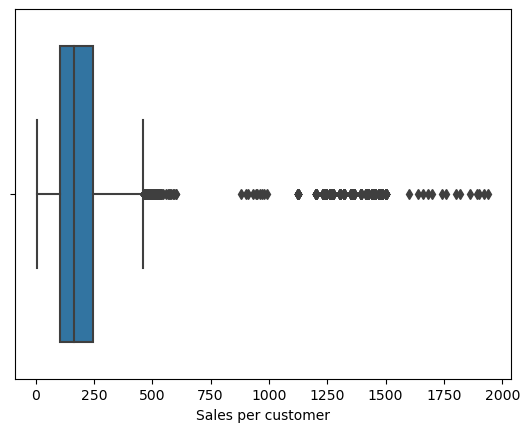

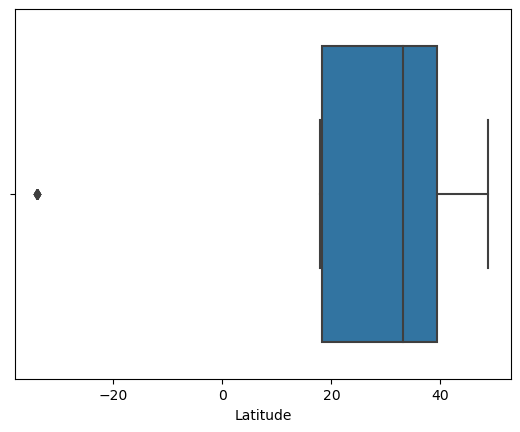

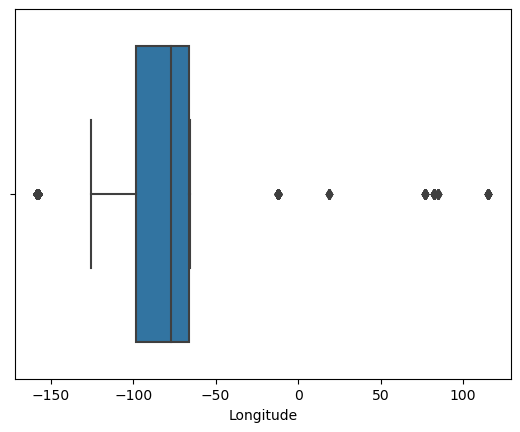

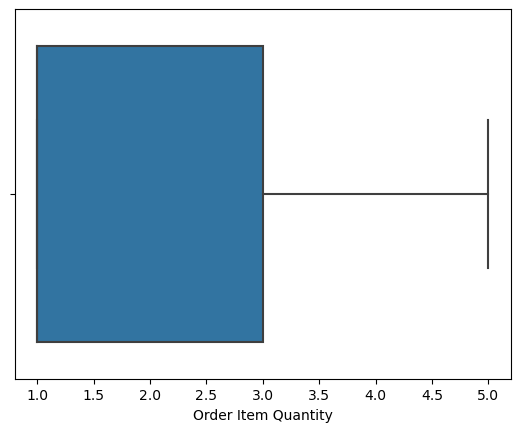

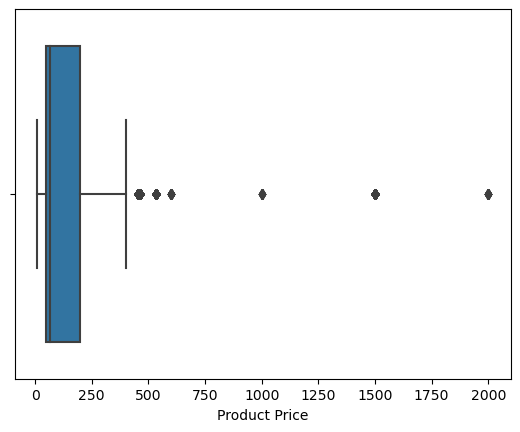

In [30]:
for i in df_supply_chain[['Sales per customer','Latitude','Longitude','Order Item Quantity','Product Price']]:
    sns.boxplot(df_supply_chain[i])
    plt.show()

**Observation**
1. the extreme values (outliers) present in the 'Sales per customer','Longitude','Product Price' but this is true value(i.e. this is possible values) so right now we built the model without doing outlier tretement. further we will saw for model performance if model not predict correctly.

In [31]:
# q1=df_supply_chain.quantile(0.25)
# q3=df_supply_chain.quantile(0.75)
# iqr=q3-q1
# ll=q1-1.5*iqr
# ul=q3+1.5*iqr
# df_supply_chain_trim=df_supply_chain[~((df_supply_chain<ll)|(df_supply_chain>ul)).any(axis=1)]
# print(ll)
# print(ul)

In [32]:
df_supply_chain.skew()

Days for shipping (real)         0.279968
Days for shipment (scheduled)   -0.733126
Sales per customer               2.910755
Late_delivery_risk              -0.215122
Latitude                        -0.094988
Longitude                       -0.484145
Order Item Quantity              0.881842
Order Profit Per Order          -4.809817
Product Price                    3.209013
order_year                       0.178249
order_month                      0.068950
order_day                        0.004669
shipping_year                    0.175826
shipping_month                   0.064891
shipping_day                     0.011636
dtype: float64

In [33]:
# -<0 left skewed
# -=0 normally distributed/symetric distribution
# ->0 right skewed

In [34]:
df_supply_chain.kurt()

Days for shipping (real)         -1.363503
Days for shipment (scheduled)    -1.226657
Sales per customer               24.104354
Late_delivery_risk               -1.953745
Latitude                         -1.552443
Longitude                         2.321247
Order Item Quantity              -0.751040
Order Profit Per Order           73.573721
Product Price                    23.481054
order_year                       -1.229636
order_month                      -1.161779
order_day                        -1.195818
shipping_year                    -1.211732
shipping_month                   -1.163445
shipping_day                     -1.199838
dtype: float64

In [35]:
# <0 platykurtic
# -=0 mesokurtic
# ->0 leptokurtic

# Univariate analysis  - Data Visualization

# Delivery Status

In [36]:
count=df_supply_chain['Delivery Status'].value_counts()  
print(count / len(df_supply_chain))

Late delivery        0.553472
Advance shipping     0.243539
Shipping on time     0.160187
Shipping canceled    0.042803
Name: Delivery Status, dtype: float64


In [37]:
count=df_supply_chain['Late_delivery_risk'].value_counts()  
print(count / len(df_supply_chain))

1    0.553472
0    0.446528
Name: Late_delivery_risk, dtype: float64


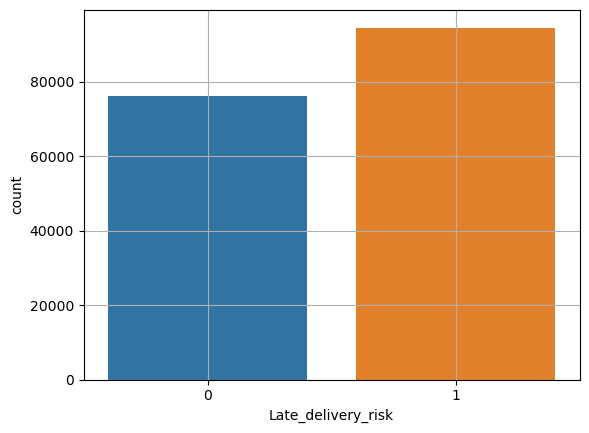

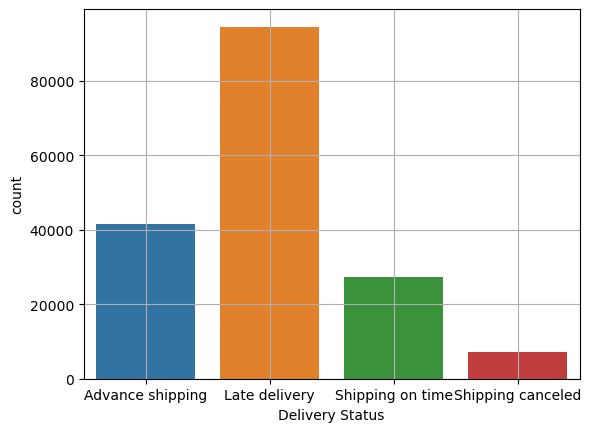

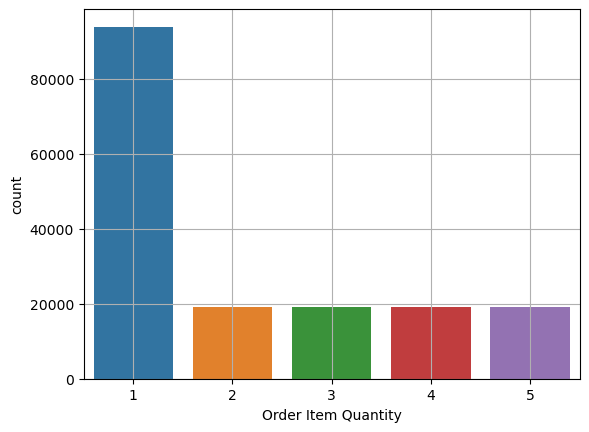

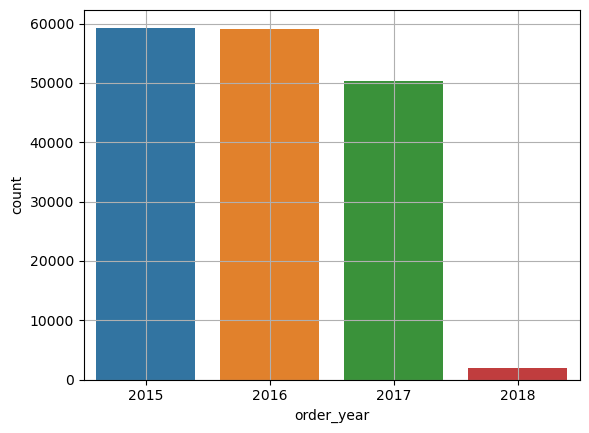

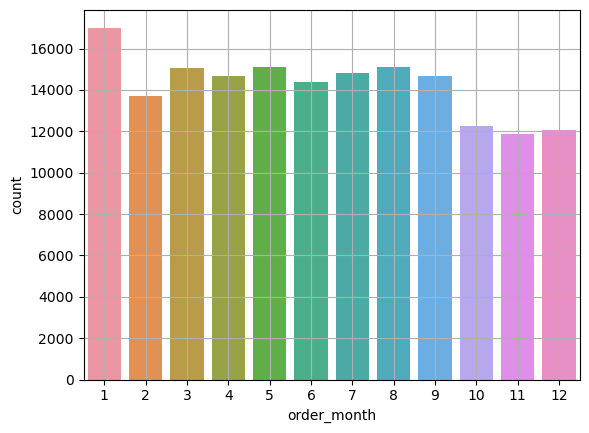

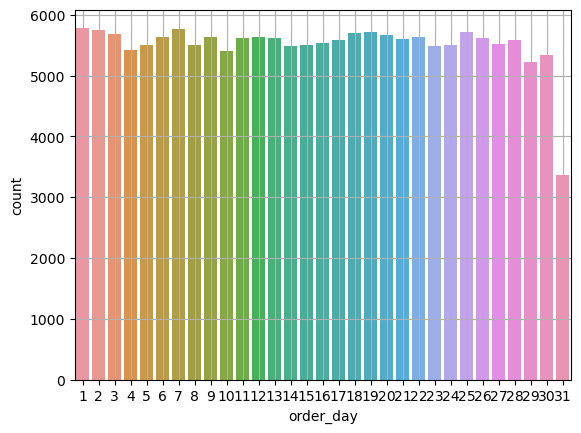

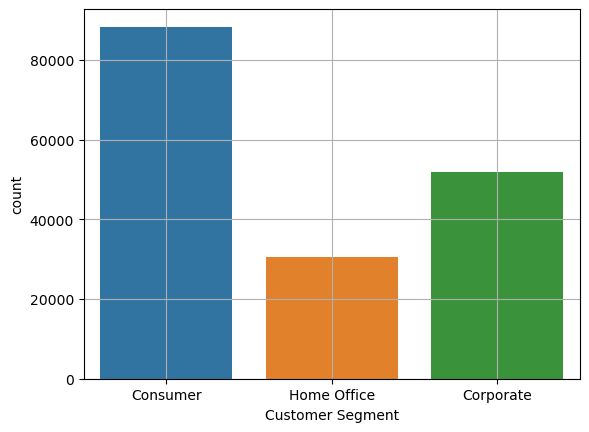

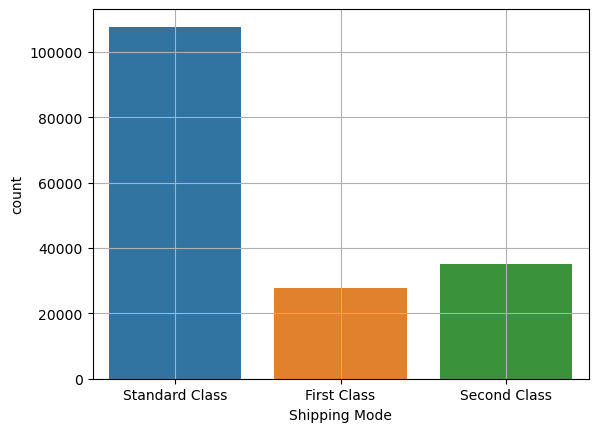

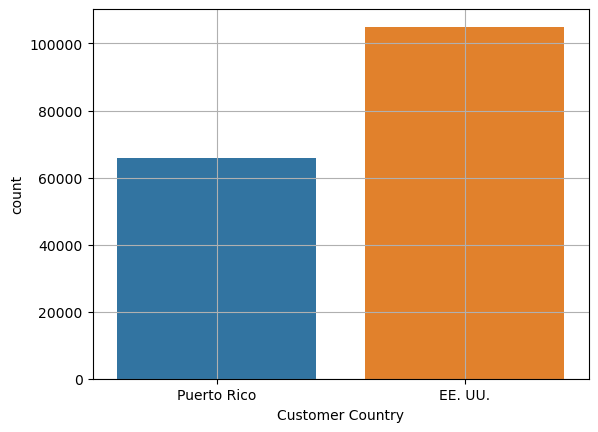

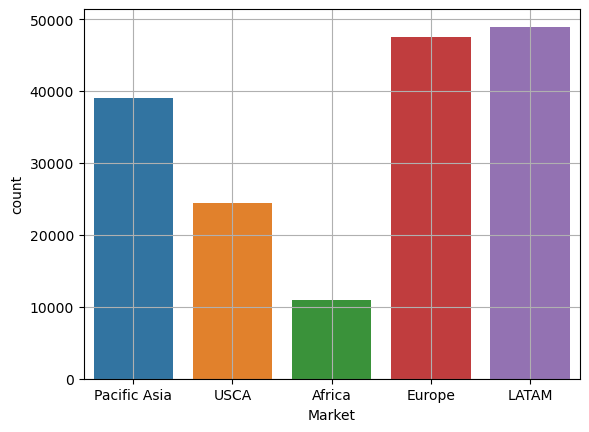

In [38]:
for i in df_supply_chain[['Late_delivery_risk','Delivery Status','Order Item Quantity','order_year','order_month','order_day',
                         'Customer Segment','Shipping Mode','Customer Country','Market']]:
    sns.countplot(df_supply_chain[i])
    plt.grid()
    plt.show()

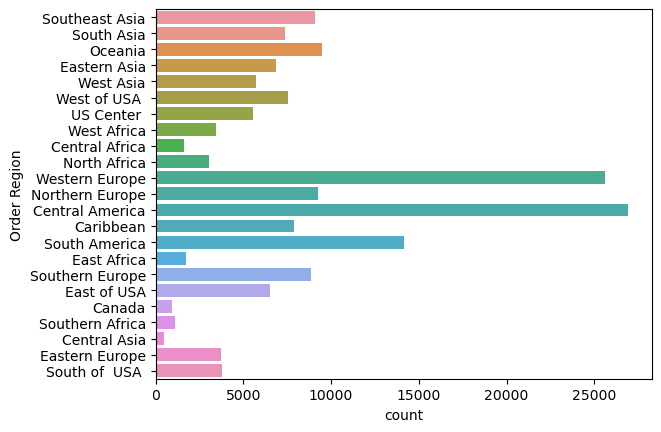

In [39]:
sns.countplot(y=df_supply_chain['Order Region'])
plt.show()

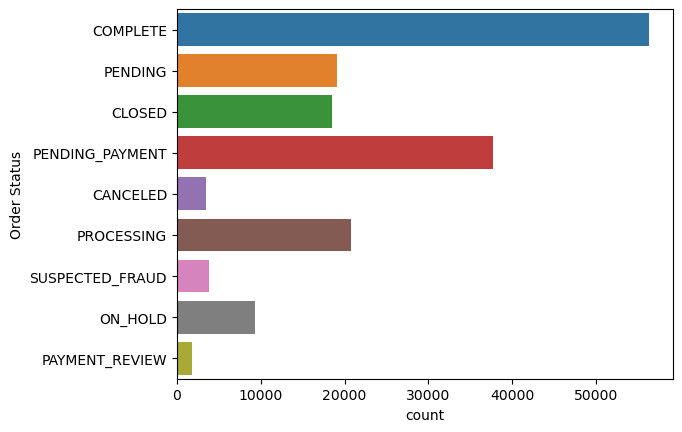

In [40]:
sns.countplot(y=df_supply_chain['Order Status'])
plt.show()

**Observations** 

1. From Late Delivey Colums, We can infer that Late Delivery Count stand at 95000 approx and Delivery on Time count below 80000

2. 55% (95000 approx) Customer preferred to buy 1 quantity and in 2,3,4,5 quantity buyer customer are equally distributsd in      remaining 45%   
3. from order_year attribute we can say the sale is decrease between 2016 and 2018

4. Central America order highest and Second most order region is  West Europe.

5. the least order region are Canada, Central Asia, Southern Africa, West Africa, East Africa and Central Africa. 

6. due to the payment pending , pending , processing the order is still not complete.


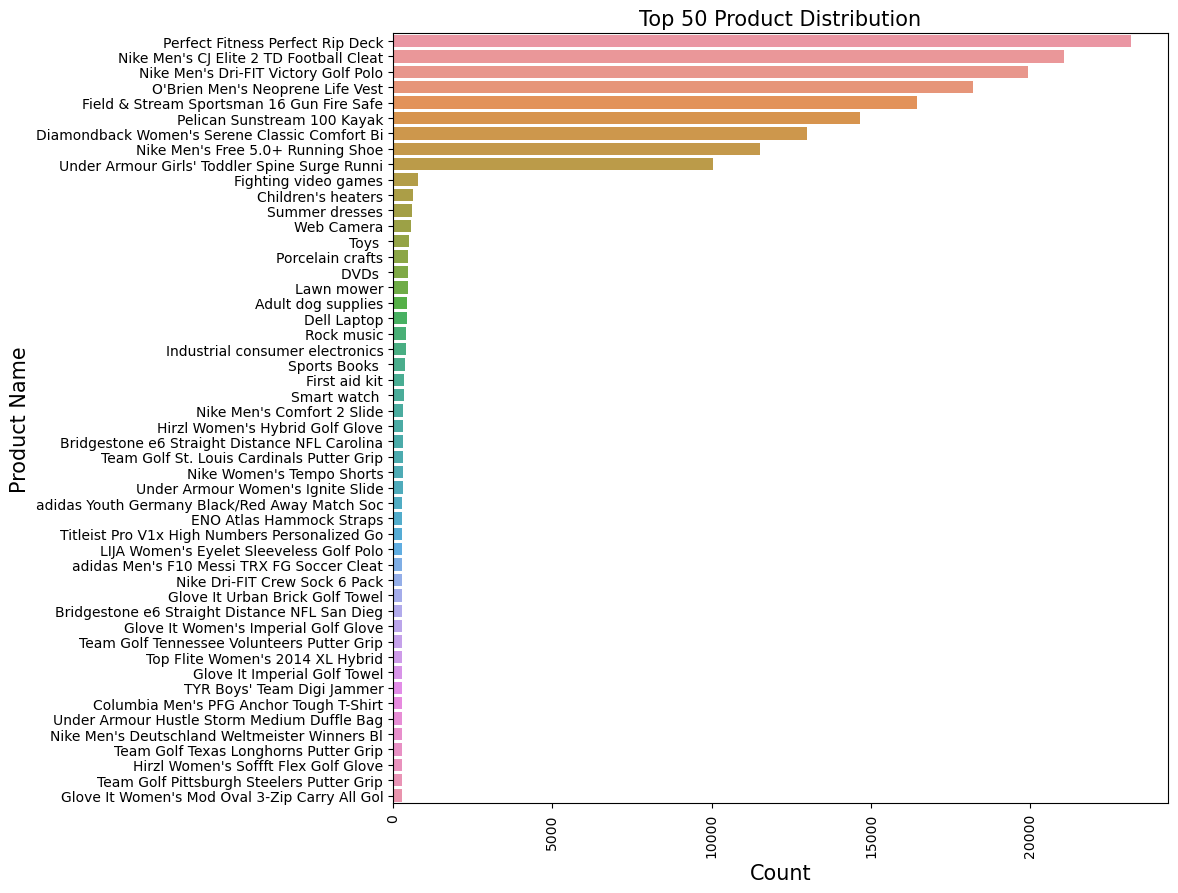

In [41]:
product_counts = df_supply_chain['Product Name'].value_counts().sort_values(ascending=False).head(50)
plt.figure(figsize=(10,10))
sns.barplot(y=product_counts.index, x=product_counts.values)
plt.xticks(rotation='vertical')
plt.title('Top 50 Product Distribution', fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Product Name', fontsize=15)
plt.show()

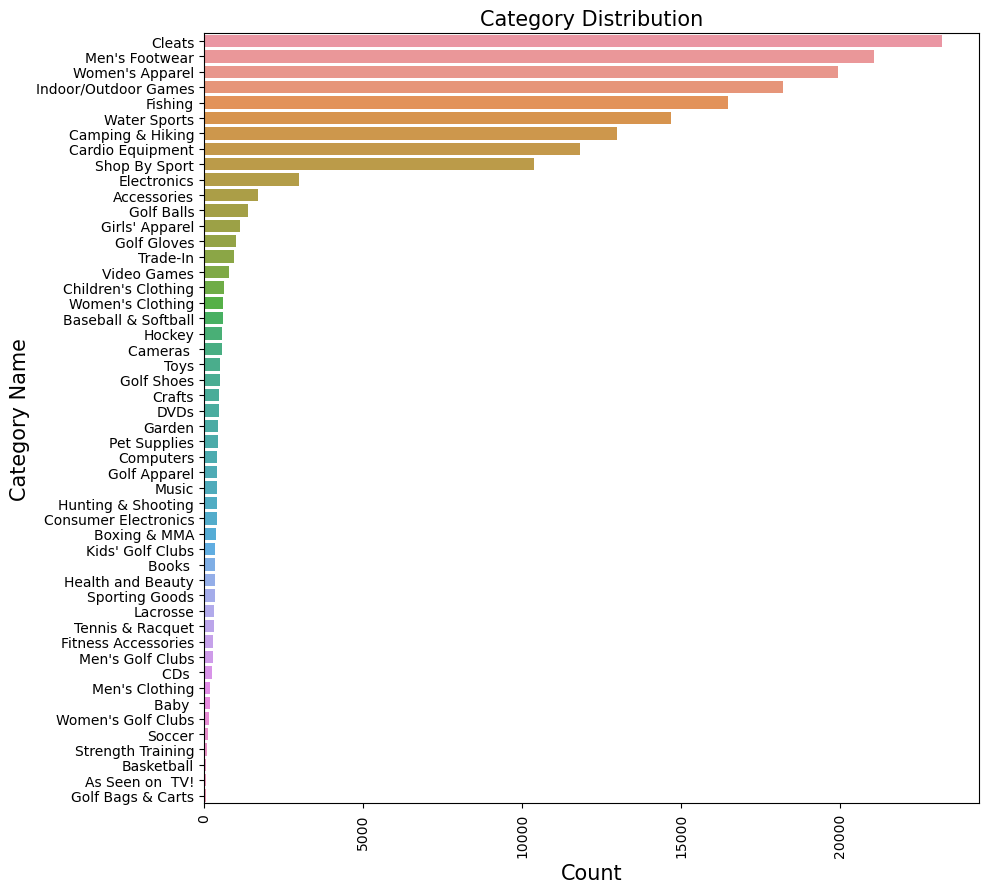

In [42]:
category_counts = df_supply_chain['Category Name'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(y=category_counts.index, x=category_counts.values)
plt.xticks(rotation='vertical')
plt.title('Category Distribution', fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Category Name', fontsize=15)
plt.show()

**Observation**
**Category Distribution**
1. Cleats were the top selling category and Golf Bags & Carts were the lowest selling category
**Highest Selling Product**
1. Perfect Fitness Perfect Rip Deck were the highest selling product.

# Bi-variate Analysis

In [43]:
df_supply_chain.select_dtypes(include=[np.number]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170782 entries, 0 to 180518
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Days for shipping (real)       170782 non-null  int64  
 1   Days for shipment (scheduled)  170782 non-null  int64  
 2   Sales per customer             170782 non-null  float64
 3   Late_delivery_risk             170782 non-null  int64  
 4   Latitude                       170782 non-null  float64
 5   Longitude                      170782 non-null  float64
 6   Order Item Quantity            170782 non-null  int64  
 7   Order Profit Per Order         170782 non-null  float64
 8   Product Price                  170782 non-null  float64
 9   order_year                     170782 non-null  int64  
 10  order_month                    170782 non-null  int64  
 11  order_day                      170782 non-null  int64  
 12  shipping_year                 

In [44]:
pd.crosstab(df_supply_chain['Order Status'],df_supply_chain['Late_delivery_risk'])

Late_delivery_risk,0,1
Order Status,,
CANCELED,3467,0
CLOSED,7947,10545
COMPLETE,23632,32695
ON_HOLD,4087,5195
PAYMENT_REVIEW,753,1046
PENDING,7925,11177
PENDING_PAYMENT,15825,21912
PROCESSING,8780,11953
SUSPECTED_FRAUD,3843,0


# plot for Categorical vs Categorical

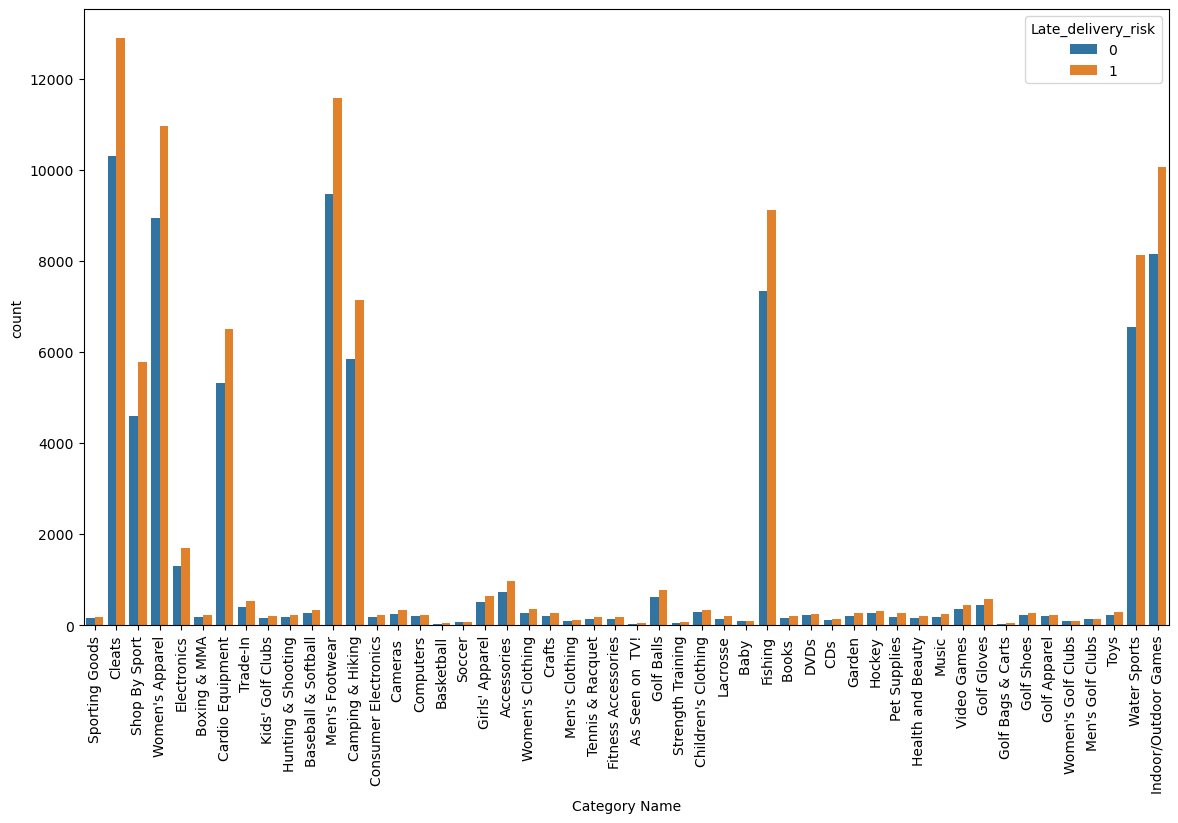

In [45]:
plt.figure(figsize=(14,8))
sns.countplot(data=df_supply_chain,x=df_supply_chain['Category Name'],hue=df_supply_chain['Late_delivery_risk'])
plt.xticks(rotation = 90)
plt.show()

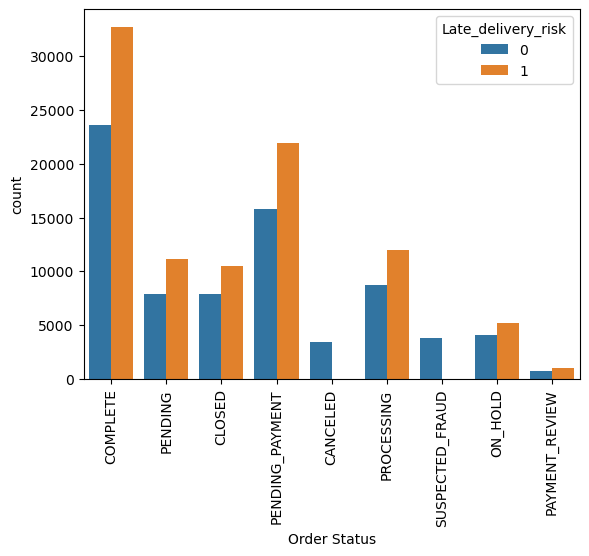

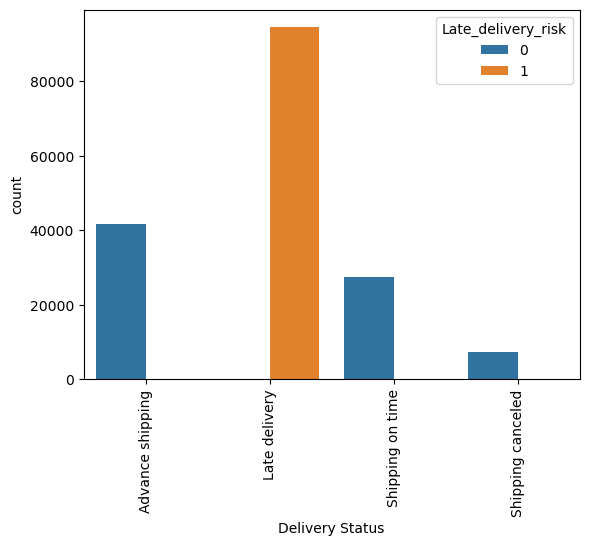

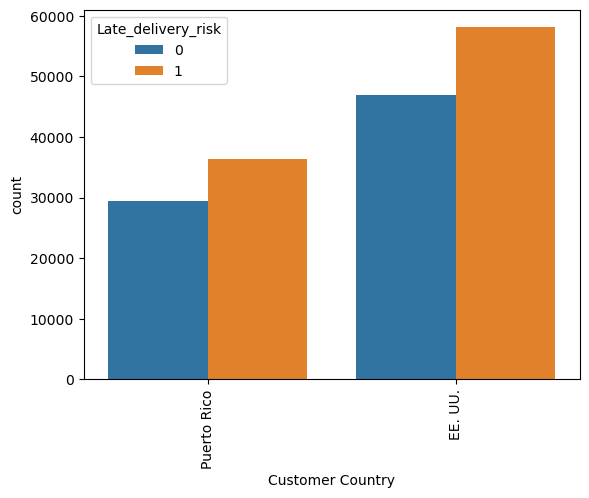

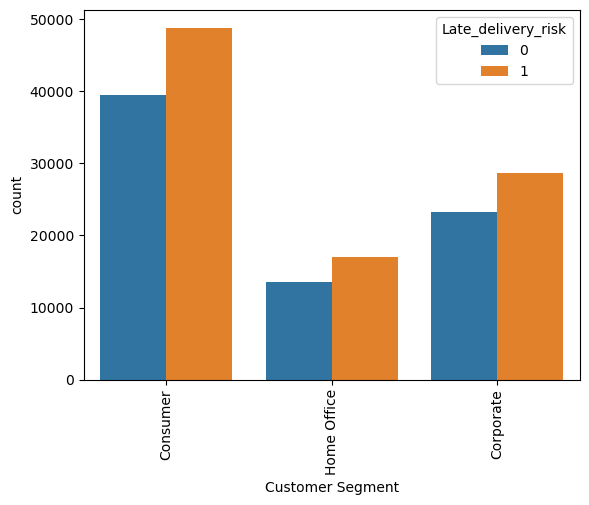

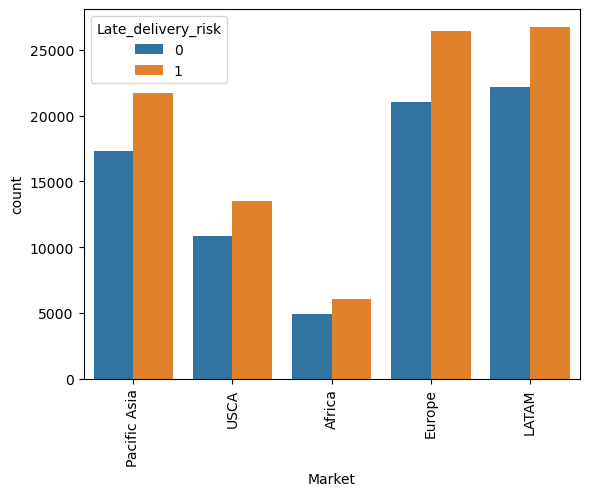

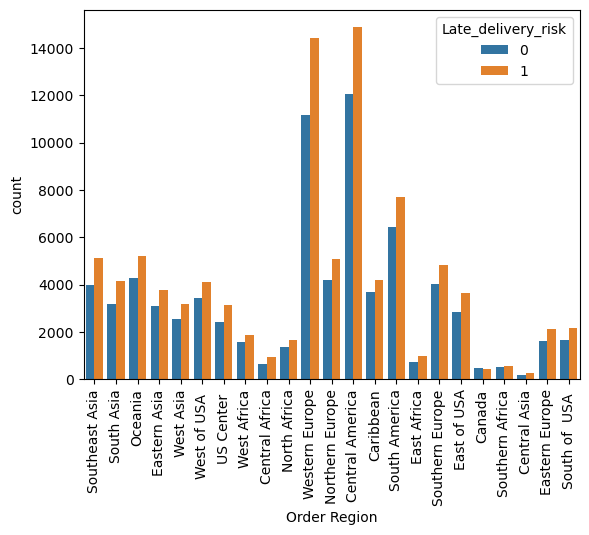

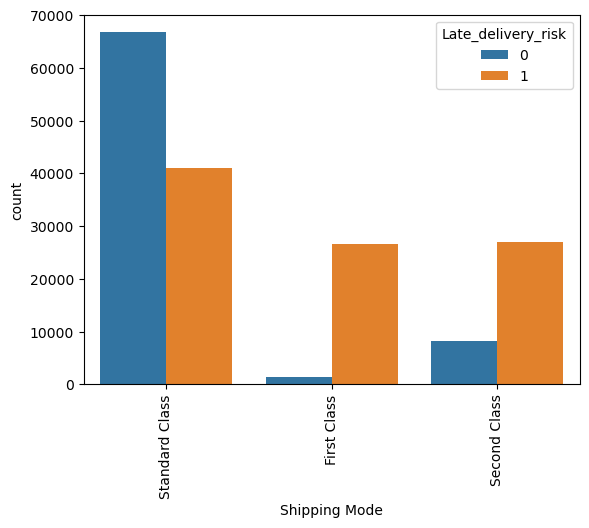

In [46]:
for i in df_supply_chain[['Order Status','Delivery Status','Customer Country','Customer Segment','Market','Order Region','Shipping Mode']]:
    df_supply_chain[i]
    sns.countplot(data=df_supply_chain,x=df_supply_chain[i],hue=df_supply_chain['Late_delivery_risk'])
    plt.xticks(rotation = 90)
    plt.show()

**Observation**
1.  from graph, every Product Category has maximum count goes to Late Delivery as compared to On Delivered
2.  In order status also same as preveous thoughts like the count is maximum in each segment except Order Canceled and fraud         suspected
3.  highest number of customer in the EE.UU. than Pieurto Rico.
4.  Consumer Customer is highest followed by Corporate and Home Office the count 90k, 58k, 35k respectively out off that Late 
    Delivered is 50k, 30k, 20k respectively.
5.  Europe, Latam, Pacific Asia is the good market than the USCA and Africa, but if compared the that we can infer that Late  
    Delivered is higher than the Deliverd in time for every market (Europe, Latam, Pacific Asia, USCA and Africa).
6.  If we consider the Region, then we can say that Western Europe and Central America is higher order placed or buyer than the 
    another region.    
7.  In Shipping Mode, We get good information about why product get late instead of in time.
    Highest count of Late Delivered got who is taking Shipping mode as First Class and Second Class Customer. 
    who is fall in Standard Class mode, those customer get 70% in time delivery.
    55% of Customer get in time delivery whoes have Shipping Mode as a Same Day.
8.  Standard Class is the most popular shipping mode.
    Late delivey is even observed in first class shipping mode.

**Observation**
**Delivery Status**
1. 54.8% orders were delivered late.
2. 23% orders were shipped in advance.
3. 17.8% orders were shipped on time.
4. 4.3% of shipping were canceled
**Segment Type Distribution**
1. 51.8% of customers are consumers.
2. 30.4% are corporates.
3. 17.9% people are from home office category.

In [ ]:
sns.pairplot(df_supply_chain,diag_kind='kde')

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(df_supply_chain.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [ ]:
df_supply_chain.corr()

In [ ]:
df_supply_chain.head()

# Hypothesis 1: Impact of delivery time on order profitability¶

In [ ]:
# calculate the delivery time difference
df_supply_chain["Delivery_Time_Difference"] = df_supply_chain["Days for shipping (real)"] - df_supply_chain["Days for shipment (scheduled)"]

# split the data into two groups based on the delivery time difference
short_delivery = df_supply_chain[df_supply_chain["Delivery_Time_Difference"] < 0]
long_delivery = df_supply_chain[df_supply_chain["Delivery_Time_Difference"] >= 0]

# Conducting a two-sample t-test to compare the mean order profit per order between the two groups
t_stat, p_value = stats.ttest_ind(short_delivery["Order Profit Per Order"], long_delivery["Order Profit Per Order"], equal_var=False)

sig_lvl = 0.05

print("Hypothesis 1: Impact of delivery time on order profitability")
print("p-value:", p_value)

if p_value < sig_lvl:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

In [ ]:
df_supply_chain["Delivery_Time_Difference"] = df_supply_chain["Days for shipping (real)"] - df_supply_chain["Days for shipment (scheduled)"]
                                                                                                           

The output indicates that the the  p-value is 0.317.

Since the p-value is greater than the significance level of 0.05, the null hypothesis (there is no significant difference in order profitability between orders with shorter actual delivery time and those with longer delivery time) cannot be rejected.

Therefore, based on the results of the test, we cannot conclude that there is a significant impact of delivery time on order profitability.

# Hypothesis 2: Impact of late delivery risk on order profit

In [ ]:
# create two groups based on the late delivery risk
high_risk = df_supply_chain[df_supply_chain["Late_delivery_risk"] == 1]
low_risk = df_supply_chain[df_supply_chain["Late_delivery_risk"] == 0]

# Conducting a two-sample t-test to compare the mean order profit per order between the two groups
t_stat, p_value = stats.ttest_ind(high_risk["Order Profit Per Order"], low_risk["Order Profit Per Order"], equal_var=False)

print("Hypothesis 3: Impact of late delivery risk on order profit")
print("p-value:", p_value)

if p_value < sig_lvl:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Based on the given output, the p-value is 0.20. Since the p-value is greater than the significance level of 0.05.

we fail to reject the null hypothesis. 

Therefore, there is no significant difference in order profitability between orders with high and low late delivery risk

In [ ]:
df_supply_chain.describe(include='O')

In [ ]:
X = df_supply_chain.drop(['Delivery Status','Category Name' ,'order_date', 'shipping_date', 'Late_delivery_risk','Category Name','Customer City','Order City','Product Name','Order Country','Order State','Delivery_Time_Difference','order_year','order_month','order_day','shipping_year','shipping_month','shipping_day','Days for shipping (real)','Days for shipment (scheduled)'], axis=1)
y = df_supply_chain['Late_delivery_risk']

In [ ]:
X.head()

In [ ]:
#df_supply_chain.groupby(df[])df_supply_chain['Customer Country'].unique()

In [ ]:
X=pd.get_dummies(X,drop_first=True)

In [ ]:
X.head()

In [ ]:
X.info()

In [ ]:
y.info()

In [ ]:
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

In [ ]:
X.head()

In [ ]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)

In [ ]:
X_train.shape,X_test.shape

In [ ]:
X_train.head()

In [ ]:
logreg = LogisticRegression(max_iter=1000)

In [ ]:
# build the model on train data 
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()

In [ ]:
print(logreg.summary())

In [ ]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test)

# convert probabilities to 0 and 1 using 'if_else'
y_class = [ 0 if x < np.mean(y_pred_prob) else 1 for x in y_pred_prob]

# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_class)

print(cm)

In [ ]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
#accuracy = (TN+TP) / len(y_test_full)
# print the accuracy
kappa = cohen_kappa_score(y_test, y_class)
print("Kappa:",kappa)
print("Accuracy:", accuracy)

The model created using logistic regression has an accuracy of 72.3%.


In [ ]:
# libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn. tree import DecisionTreeClassifier


# libraries for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve
from sklearn.metrics import classification_report


In [ ]:
clfs = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# creating 
models_report = pd.DataFrame(columns=['model name', 'accuracy', 'recall', 'precision', 'f1 score'])


# fit and evaluate each model
for clf, clf_name in list(zip(clfs.values(),clfs.keys())):
    clf.fit(X_train, y_train)
    print('Fitting Classifier.....', clf_name)
    y_pred = clf.predict(X_test)
    t = pd.Series({
        'model name':clf_name,
        'accuracy':accuracy_score(y_test, y_pred),
        'recall':recall_score(y_test, y_pred),
        'precision':precision_score(y_test, y_pred), 
        'f1 score':f1_score(y_test, y_pred)
    })
    models_report = models_report.append(t, ignore_index=True)
    
models_report = models_report.sort_values(by='f1 score', ascending=False)
models_report

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
pd.options.display.max_columns=None
pd.options.display.max_rows = None
from scipy import stats
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn import metrics 
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve,roc_auc_score
# libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn. tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# libraries for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold,GridSearchCV

# Load Dataset

In [ ]:
df_supply_chain_1= pd.read_csv('DataCoSupplyChainDataset[1].csv',encoding='latin-1')
df_supply_chain_1.head(5)

# Copy the dataset 

In [ ]:
df_supply_chain=df_supply_chain_1.copy()

In [ ]:
df_supply_chain.head()

**Observation**
1.  In 'Days for shipping (real)' and 'Days for shipment (scheduled)' columns have the null values so we will remove the rows from data those have value 0 days 

# Checking the info

In [ ]:
df_supply_chain.shape

In [ ]:
df_supply_chain.info()

**Observation**
1. The dataset has 180519 observation and 53 variables.
2. there is 24 categorical columns and 29 numericals columns 
3. 2 columns have null values more than 85% Product Description,Order Zipcode.
4. the data type for the order_date and shipping_date is wrong so we will change the data type

# Converting the datatype to datetime
# Droping the column where data is missing more than 85% # 

In [ ]:
# from the that we are extracting the date only 
df_supply_chain['order_date'] = pd.to_datetime(df_supply_chain['order date (DateOrders)']).dt.date
df_supply_chain['shipping_date']=pd.to_datetime(df_supply_chain['shipping date (DateOrders)']).dt.date



# Converting categorical features that represent date and time to datetime datatype.
df_supply_chain['order_date'] = pd.to_datetime(df_supply_chain['order_date'])
df_supply_chain['shipping_date']=pd.to_datetime(df_supply_chain['shipping_date'])




# Handling Time and date variables

df_supply_chain['order_year'] = pd.DatetimeIndex(df_supply_chain['order_date']).year
df_supply_chain['order_month'] = pd.DatetimeIndex(df_supply_chain['order_date']).month
df_supply_chain['order_day'] = pd.DatetimeIndex(df_supply_chain['order_date']).day
df_supply_chain['shipping_year'] = pd.DatetimeIndex(df_supply_chain['shipping_date']).year
df_supply_chain['shipping_month'] = pd.DatetimeIndex(df_supply_chain['shipping_date']).month
df_supply_chain['shipping_day'] = pd.DatetimeIndex(df_supply_chain['shipping_date']).day



# Droping the Old column  and adding new column instead of the shipping date (DateOrders) to shipping_date ,
# order date (DateOrders) instead of order_date 
df_supply_chain=df_supply_chain.drop(['shipping date (DateOrders)','order date (DateOrders)'],axis=1)

In [ ]:
df_supply_chain=df_supply_chain.drop(['Order Zipcode','Product Description'],axis=1)

# Checking the Multicolinearity between features or Any Duplicate features Present

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(df_supply_chain.corr(),annot=True,cmap='RdYlGn')
plt.show()

After comparing the values in columns pairs having co-relation of 1, we can see that all values are equal for these pair of 
columns. We can drop one of the columns from each of the above pairs as they are duplicate columns of each other.

In [ ]:
df_supply_chain['Product Status'].unique()

after see the heat map - Product Status -  there is no relationship with the any columns so we can remove  

1. Product Status

firstly we will droping the 7 column
1. Order Customer Id,
2. Order Item Total,
3. Benefit per order,
4. Order Item Cardprod Id,
5. Product Category Id,
6. Order Item Product Price
7. Product Status

In [ ]:
df_supply_chain=df_supply_chain.drop(['Order Customer Id','Order Item Total','Benefit per order','Order Item Cardprod Id','Product Category Id','Order Item Product Price','Product Status'],axis=1)

In the data there is so much customer details that dosent needed to predict our data so we will remove this feature from dataset.
1.  Customer City                  
2.  Customer Country               
3.  Customer Email                 
4.  Customer Fname                 
5.  Customer Id                    
6.  Customer Lname                 
7.  Customer Password                            
8.  Customer State                 
9.  Customer Street                
10.  Customer Zipcode               
11.  Department Id                  
12.  Department Name                
13.  Latitude                       
14.  Longitude

In [ ]:
df_supply_chain=df_supply_chain.drop(['Customer City','Customer Country','Customer Email','Customer Fname','Customer Id',
                                      'Customer Lname','Customer Password','Customer State','Customer Street',
                                      'Customer Zipcode','Department Id','Department Name','Latitude','Longitude'],axis=1)

some columns give the description of product that also not helpfull for build a model so we will drop this column also from our dataset 
1. Category Id 
2. Order Id
3. Order Item Discount Rate
4. Order Item Id
5. Order Item Profit Ratio
6. Product Card Id
7. Product Image	
8. Sales ----- alreary we have the column sales_per_customer so this column not required. 

In [ ]:
df_supply_chain=df_supply_chain.drop(['Category Id','Order Id','Order Item Discount Rate','Order Item Id','Order Item Profit Ratio'
                                     ,'Product Card Id','Product Image','Sales'],axis=1)

Here we are adding one column Delivery_Time_Difference for know the maximum late delivery time in days.

In [ ]:
# Calculate the delivery time difference
delivery_time_difference = df_supply_chain["Days for shipping (real)"] - df_supply_chain["Days for shipment (scheduled)"]

# Insert the new column at the desired position
df_supply_chain.insert(3, "Delivery_Time_Difference", delivery_time_difference)

#  Checking info after handeling Data

In [ ]:
df_supply_chain.info()

**Observation**
1. The dataset has 180519 observation and 29 variables.
2. there is 12 categorical columns and 17 numericals columns 

# 5 Point summary

In [ ]:
df_supply_chain.describe()

**Observation**
1. In real, maximum days required to shipping is 6 but as per the schedule is 4. from the data, 25% of delivery estimation is   
   on a time(day of scheduled) some order they delivered on same day of order.
2. from Delivery time difference column, the some order delivered 2 days before the delivery and some order delivered 4 days 
   late by scheduled time.
3. Average Sale per customer is 183.10 dollar,minimum sale is 7.5 dollar and maximum is 1940 dollar. 50% of customer spend 164 
   dollar.
4. 54.8% item delivery is late,only 45.2 % delivered on time or schedule time.

5. Highest disount given by saler is 500 dollar and averagr discount per customer is 20.66 dollar. 25% of people get 5.4 dollar    as discout this value dramaticaaly change for every quatile for 50% value stand at 14, for 75% the discount was 29.9 dollar. 
6. Most of customer interested to buy only one product and some customer are buying more than 1,the highest quantity of buying  
   item is 5
7. Highest benefit per order is 911 dollar and loss is 4275 dollar, average benefit per order is 22 dollar.
8. Maximum price of product is 2000 dollar and minimum price of product is 10 dollar , average price per product is 141 dollar 
   approximately.
   

In [ ]:
df_supply_chain.describe(include='O')

**Observation**
1. the customer buying product using Debit,Cash,Transfer etc out of that customer love to buy using Debit Card method.
2. the late delivery is the highest weightage than others.
3. top selling category is Cleats 
4. lots of customer from Consumer type segment 
5. LATAM is a good Market than another market to sell or Deliverred the order
6. Highest order from Santo Domingo city located in caribean region. Santo Domingo is situated on the southern coast of the   
   Dominican Republic. 
7. Estados Unidos contry has highest buyer than another country.
8. Lots customer around 55% peolpe(customer) preffered Standard Class Delivery instead of another.

# Univariante analysis  - Datavisualization

# Outliers Checking

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_supply_chain.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.show()

**Observation**
1. the extreme values (outliers) present in the 'Sales per customer', 'Order Item Discount', 'Order Profit Per Order', 'Product Price' but this is true value(i.e. this is possible values) so right now we built the model without doing outlier tretement. further we will saw for model performance if model not predict correctly.

In [ ]:
for i in df_supply_chain[['Days for shipping (real)','Days for shipment (scheduled)','Delivery_Time_Difference',
                                   'Late_delivery_risk','Order Item Quantity','order_year','order_month','Type', 
                                   'Category Name', 'Customer Segment','Market','Order Region','Order Status',
                                   'Shipping Mode']]:
    sns.countplot(df_supply_chain[i])
    plt.grid()
    plt.xticks(rotation=90)
    plt.show()


**Observations** 

1. more than 55000 delivery day of shipping (real) is 2 days. day 3,4,5,6 are normally equaly distributed in between 28000 to      29000. 
2. According to schedule all order should be delivered within 4 days.delivery within 4 days, within 2 days, within 1 days, and 
   same day delivery count around 105000,48000,25000,5000 respectively.
3. Aprox 61000 delivery late by 1 days and 45000 delivery late between 2 and 4 days. before the schedule item delivered is 
   45000 approximately.
4. From Late Delivey Colums, We can infer that Late Delivery Count stand at 98000 approx and Delivery on Time count above 80000

5. 55% (98000 approx) Customer preferred to buy 1 quantity and in 2,3,4,5 quantity buyer customer are equally distributsd in      remaining 45%   
6. from order_year attribute we can say the sale is decrease between 2016 and 2018

7. Most of customer prefered to by product using Debit Card (approx 70000 people). only 20000 people choose payment method as a    cash, 50000 customer use Bank Transfer method remaining use a another payment method as a payment.

8.  Cleats was the top selling category and Golf Bags & Carts falls in the lowest selling category
9.  the Most custumer from Consumer (around 88000) then followed by corporate stand at 57000 and 37000 aprox from home office 
    category.
10. Central America order highest and Second most order region is  West Europe.
11. More than 100000 customer from LATAM and Europe market. 
11. The least order region are Canada, Central Asia, Southern Africa, West Africa, East Africa and Central Africa. 
12. Due to the payment pending , pending , processing the order is still not complete.
13. There is 4 type of shipping mode Standard Class, Second class, First class, same day - 112000,36000,23000,7000 approx 
    respectively.

In [ ]:
product_counts = df_supply_chain['Product Name'].value_counts().sort_values(ascending=False).head(50)
plt.figure(figsize=(10,10))
sns.barplot(y=product_counts.index, x=product_counts.values)
plt.xticks(rotation='vertical')
plt.title('Top 50 Product Distribution', fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Product Name', fontsize=15)
plt.show()

**Observation**

**Highest Selling Product**
1. Perfect Fitness Perfect Rip Deck were the highest selling product.

# Bi-variate Analysis

In [ ]:
df_supply_chain.select_dtypes(include=[np.number]).info()

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(data=df_supply_chain,x=df_supply_chain['Category Name'],hue=df_supply_chain['Late_delivery_risk'])
plt.xticks(rotation = 90)
plt.show()

**Observation**
1.  From graph, every Product Category has maximum count goes to Late Delivery as compared to On time Delivered. Product 
    Category cleats stood at highest count then Mens footware , Womens Apparel count at 12000,11000 aprox respectively.

In [ ]:
for i in df_supply_chain[['Order Status','Delivery Status','Customer Segment','Market','Order Region','Shipping Mode']]:
    df_supply_chain[i]
    sns.countplot(data=df_supply_chain,x=df_supply_chain[i],hue=df_supply_chain['Late_delivery_risk'])
    plt.xticks(rotation = 90)
    plt.show()

**Observation**

1.  In order status, late delivery count is maximum in each segment except Order Canceled and fraud suspected.
2.  Around 100000 order delivered late, 40000 shipping in advance, on time delivered is 35000 and 5000 stood at order canceled. 
3.  Consumer Customer is highest followed by Corporate and Home Office the count 90k, 58k, 35k respectively out off that Late 
    Delivered is 50k, 30k, 20k respectively.
4.  Europe, Latam, Pacific Asia is the good market than the USCA and Africa, but if compared the that we can infer that Late  
    Delivered is higher than the Deliverd in time for every market (Europe, Latam, Pacific Asia, USCA and Africa).
5.  If we consider the Region, the Western Europe and Central America is higher order placed  than the 
    another region, count is 12000 and 13000 respectively. late delivery stand at 15000 and 15500 respectively.   
6.  In Shipping Mode, We get good information about why product get late instead of in time.
    Highest count of Late Delivered got who is taking Shipping mode as First Class and Second Class Customer. 
    who is fall in Standard Class mode, those customer get 70% in time delivery.
    55% of Customer get in time delivery whoes have Shipping Mode as a Same Day.
7.  Standard Class is the most popular shipping mode.
    Late delivey is even observed in first class shipping mode.

In [ ]:
pd.crosstab(df_supply_chain['Order Status'],df_supply_chain['Late_delivery_risk'])

In [ ]:
pd.crosstab(df_supply_chain['Order Status'],df_supply_chain['Late_delivery_risk'])[0].sum()

In [ ]:
pd.crosstab(df_supply_chain['Order Status'],df_supply_chain['Late_delivery_risk'])[1].sum()

**Observation**
**Late Delivery**
1. Total 98977 order delivered late. 
2. Before Delivery or on time delivered is 81542

**Observation**
**Delivery Status**
1. 54.8% orders were delivered late.
2. 23% orders were shipped in advance.
3. 17.8% orders were shipped on time.
4. 4.3% of shipping were canceled
**Segment Type Distribution**
1. 51.8% of customers are consumers.
2. 30.4% are corporates.
3. 17.9% people are from home office category.

In [ ]:
df_supply_chain.info()

# Feature Selection For Machine Building

In [ ]:
df_supply_chain.boxplot(column='Sales per customer',by='Late_delivery_risk')
plt.show()

In [ ]:
df_supply_chain.boxplot(column='Delivery_Time_Difference',by='Late_delivery_risk')
plt.show()

In [ ]:
df_supply_chain.boxplot(column='Order Item Discount',by='Late_delivery_risk')
plt.show()

In [ ]:
df_supply_chain.boxplot(column='Order Item Quantity',by='Late_delivery_risk')
plt.show()

In [ ]:
df_supply_chain.boxplot(column='Order Profit Per Order',by='Late_delivery_risk')
plt.show()

In [ ]:
df_supply_chain.boxplot(column='Product Price',by='Late_delivery_risk')
plt.show()

**Observation**

From BoxPlot, 

1. sales per customer, 
2. order item discount, 
3. order item quantity, 
4. order profit per order, 
5. product price  

Because exhibit little variation or substantial overlap, it suggests that the feature may not have a strong impact on the   target variable 

**Observation**

06. Days for shipping (real)
07. Days for shipment (scheduled)
08. Delivery Status ----------------------------- Advance shipping, Late delivery, Shipping canceled, Shipping on time
09. Category name -----------------------------------------------   Description of the product category      
10. Order City  
11. Order status  ----------------------------------------------   Pending, Closed, Pending_payment etc total 8 type
12. Product name
13. order_date                              
14.  shipping_date
15. order_year
16. order_month
17. order_day
18. shipping_year
19. shipping_month
20. shipping_day

# Encoding- Target Encoding 

In [ ]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()
df_supply_chain['Type'] = encoder.fit_transform(df_supply_chain['Type'], df_supply_chain['Delivery_Time_Difference'])
df_supply_chain['Customer Segment'] = encoder.fit_transform(df_supply_chain['Customer Segment'], df_supply_chain['Delivery_Time_Difference'])
df_supply_chain['Market'] = encoder.fit_transform(df_supply_chain['Market'], df_supply_chain['Delivery_Time_Difference'])
df_supply_chain['Order Country'] = encoder.fit_transform(df_supply_chain['Order Country'], df_supply_chain['Delivery_Time_Difference'])
df_supply_chain['Order Region'] = encoder.fit_transform(df_supply_chain['Order Region'], df_supply_chain['Delivery_Time_Difference'])
df_supply_chain['Order State'] = encoder.fit_transform(df_supply_chain['Order State'], df_supply_chain['Delivery_Time_Difference'])
df_supply_chain['Shipping Mode'] = encoder.fit_transform(df_supply_chain['Shipping Mode'], df_supply_chain['Delivery_Time_Difference'])


In [ ]:
X = df_supply_chain[['Type','Delivery_Time_Difference','Customer Segment','Market','Order Country','Order Region','Order State','Shipping Mode']]
y = df_supply_chain['Late_delivery_risk']

In [ ]:
X.head(2)

In [ ]:
y.head(2)

In [ ]:
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

In [ ]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [ ]:
clfs = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

# creating 
models_report = pd.DataFrame(columns=['model name', 'accuracy', 'recall', 'precision', 'f1 score'])


# fit and evaluate each model
for clf, clf_name in list(zip(clfs.values(),clfs.keys())):
    clf.fit(X_train, y_train)
    print('Fitting Classifier.....', clf_name)
    y_pred = clf.predict(X_test)
    t = pd.Series({
        'model name':clf_name,
        'accuracy':accuracy_score(y_test, y_pred),
        'recall':recall_score(y_test, y_pred),
        'precision':precision_score(y_test, y_pred), 
        'f1 score':f1_score(y_test, y_pred)
    })
    models_report = models_report.append(t, ignore_index=True)
    
models_report = models_report.sort_values(by='f1 score', ascending=False)
models_report

In [ ]:
rf_classification = RandomForestClassifier(n_estimators = 10,random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)

# predict the attrition for test set
y_pred = rf_model.predict(X_test)

# generate a classification report
print(classification_report(y_test, y_pred))

In [ ]:
roc_auc_score(y_test, y_pred)